In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.optimizers import Adam

2025-10-23 11:17:57.675982: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-10-23 11:17:57.698165: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-10-23 11:17:57.717176: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-10-23 11:17:57.717215: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-10-23 11:17:57.743549: I tensorflow/core/platform/cpu_feature_gua

In [2]:
df = pd.read_csv('./data/ozone.csv')

training_data_set = df[['Temp', 'Ozone']]
display(training_data_set) # 153 rows × 2 columns

# 데이터 전처리 진행
# 1. 결측치 처리
training_data_set = training_data_set.dropna(how='any')
display(training_data_set) # 116 rows × 2 columns

# 학습데이터 생성
x_data = training_data_set['Temp'].values.reshape(-1,1)
y_data = training_data_set['Ozone'].values.reshape(-1,1)


,Temp,Ozone
0,67,41.0
1,72,36.0
2,74,12.0
3,62,18.0
4,56,NaN
...,...,...
148,70,30.0
149,77,NaN
150,75,14.0
151,76,18.0


,Temp,Ozone
0,67,41.0
1,72,36.0
2,74,12.0
3,62,18.0
5,66,28.0
...,...,...
147,63,14.0
148,70,30.0
150,75,14.0
151,76,18.0


In [3]:
# Model 생성
# Tensorflow는 모델이 Library로 제공!(class로 제공)
keras_model = Sequential()
# Pytorch는 모델이 class로 제공 => 우리가 class를 생성

# Input Layer
# input_layer = Input(shape=(1,))
# Flatten Layer (우리 예제에서는 의미 없음)
# Flatten Layer는 1차원으로 축소하는 것
flatten_layer = Flatten(input_shape=(1,))

# output layer
output_layer = Dense(input_shape=(1,),
                     units=1,
                     activation='linear')

keras_model.add(output_layer) # model안에 layer 추가

/home/kiyong/anaconda3/envs/data_env/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/home/kiyong/anaconda3/envs/data_env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
# model의 compile => 모델 굳히면서 기타 설정 추가
keras_model.compile(optimizer=Adam(learning_rate=1e-4),
                    loss='mse')
# learning_rate 바꿔가면서 모델 수정

In [5]:
# 모델 학습
keras_model.fit(x_data,
                y_data,
                epochs=1000,
                verbose= 0)
# epochs는 하이퍼파라미터 (하이퍼파라미터 : 내가 결정해야 되는 수)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


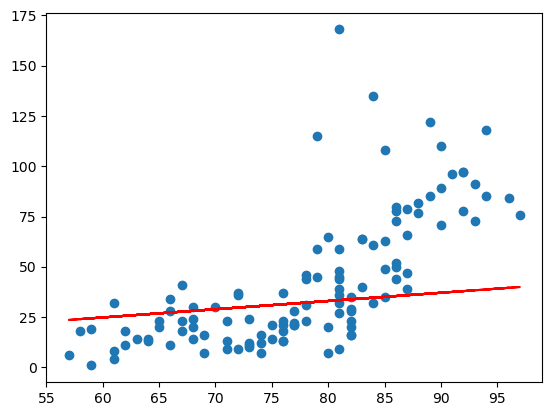

In [6]:
# 모델이 생성되었으니 이제 예측
keras_result = keras_model.predict(np.array([[60]]))
keras_result

# Tensorflow로 그리기
t_weights, t_bias_ = output_layer.get_weights()

# 그래프로 확인
plt.scatter(x_data.ravel(),
            y_data.ravel())
plt.plot(x_data.ravel(),
         x_data.ravel() * t_weights.ravel()
         + t_bias_.ravel(),
         color='r')
plt.show()

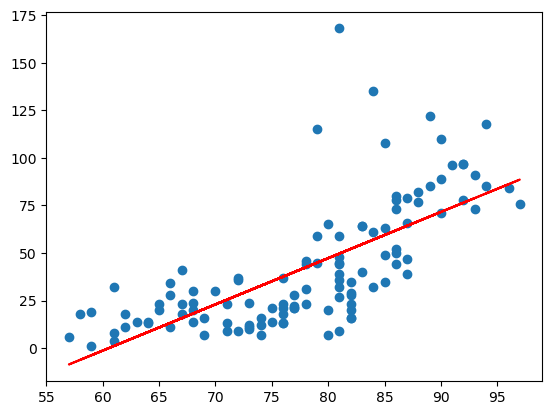

In [7]:
from sklearn import linear_model

# 모델생성
sklean_model = linear_model.LinearRegression()

# 모델학습
sklean_model.fit(x_data,
                 y_data)

# 예측
sklean_result = sklean_model.predict(np.array([[60]]))
sklean_result # -1.27
# 그래프로 확인
# 산점도 그리고 모델의 그랠프를 그려보면 돼요
plt.scatter(x_data.ravel(),
            y_data.ravel())
plt.plot(x_data.ravel(),
         x_data.ravel() * sklean_model.coef_.ravel()
         + sklean_model.intercept_.ravel(),
         color='r')
plt.show()

In [8]:
# 같은 내용을 Pytorch로 구현
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim

# 데이터 로딩 및 전처리
df = pd.read_csv('./data/ozone.csv')
training_data_set = df[['Temp', 'Ozone']]
training_data_set

,Temp,Ozone
0,67,41.0
1,72,36.0
2,74,12.0
3,62,18.0
4,56,NaN
...,...,...
148,70,30.0
149,77,NaN
150,75,14.0
151,76,18.0


In [9]:
# Pytorch로 모델 구현
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 데이터셋을 변경
# 준비해 놓았던 2차원 ndarray를 Pytorch에서 사용하는 tensor로 변환
x_tensor = torch.FloatTensor(x_data).to(device)
y_tensor = torch.FloatTensor(y_data).to(device)

In [10]:
# Pytorch로 모델 구현

# 모델 class를 직접 define해야 해요! => 단, 상속해서 만들어요!
class LinearModel(nn.Module):
    def __init__(self):
        super().__init__()
        # property 설정
        self.linear = nn.Linear(1, 1) # 입력차원, 출력차원
    
    # 순전파
    def forward(self,x):
        return self.linear(x)

# 실제로 모델을 만들어야 해요!
torch_model = LinearModel().to(device)

# loss 함수
# Tensorflow에서는 그냥 지정 compile()에서 지정
criterion = nn.MSELoss() # mse형태의 loss 함수

# optimizer
optimizer = optim.Adam(torch_model.parameters(),
                       lr=1e-4)

In [20]:
# 학습을 진행
# 직접 for문을 돌려줘야 해요
epochs = 100000

# 2000
for epoch in range(epochs):
    # 1. 모델에 데이터를 입력해서 예측값ㅇ르 계산해요!
    y_pred = torch_model(x_tensor) # 모델을 통과한 예측값을 얻어내요!
    
    # 2. 예측값을 얻어냈으니 정답과 비교 => Loss함수 수행
    loss = criterion(y_pred, y_tensor) # 계산된 loss값을 가지고 있는 객체

    # 3. optimizer가 등장해서 w와 b를 갱신하는 작업을 진행
    #    그런데 이 방식이 back propagation이라는 방식으로 진행
    #    이 작업을 하기 위해 optimizer가 현재 가지고 있는
    #    gradient를 초기화 해야 해요!
    optimizer.zero_grad()
    #    실제 역전파 작업
    loss.backward()
    optimizer.step() # 가중치를 갱신

tensor([[31.8765]])


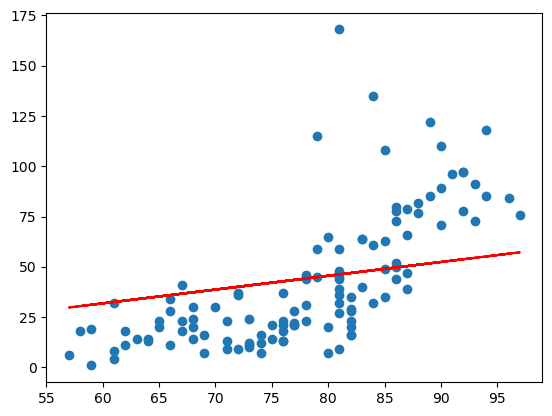

In [22]:
# 학습이 끝났으니 예측 작업 진행
with torch.no_grad(): # 속도를 높이기 위함
    # 알고싶은 값을 tensor로 생성
    test_data = torch.tensor([[60]], dtype=torch.float32).to(device)
    torch_y_pred = torch_model(test_data)
    print(torch_y_pred) # 31.8765

# pytorch도 그래프를 한번 그려보아요!
weight = torch_model.linear.weight.item() # W의 값
bias = torch_model.linear.bias.item() # bias값

# 산점도 그래프로 확인
plt.scatter(x_data.ravel(),
            y_data.ravel())
plt.plot(x_data.ravel(),
         x_data.ravel() * weight
         + bias,
         color='r')
plt.show()

In [ ]:
# 이상치는 그 값이 일반적인 값들과 편차가 크게 나는 값을 의미
# 데이터 자체를 불안정하게 만드는 요인 중 하나

# 이상치는 크게 2가지로 나눌 수 잇어요!
# 독립변수에서 이상치 => 우리 예제로 따지자면 온도에서 이상한 값이 나오는 것
# -> 레버리지 관측값 (leverage point)
# 종속변수에서 이상치 => 아웃라이어(outlier)

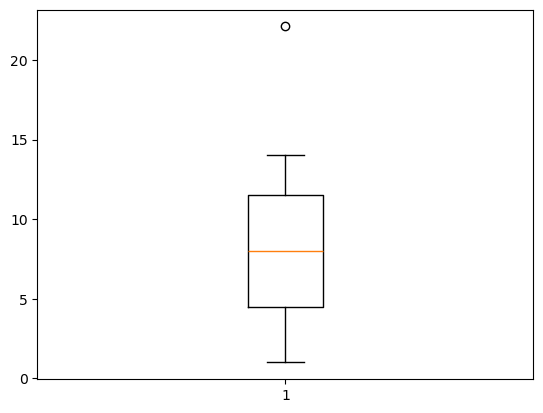

In [1]:
import numpy as np
import matplotlib.pyplot as plt

data = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,22.1])

plt.boxplot(data)
plt.show()

In [2]:
# 사분위값을 구해보자. 
first_ = np.percentile(data,25) # 4.5
third_ = np.percentile(data,75) # 11.5

IQR_value = third_ - first_ # 7.0
IQR_value

# upper bound
upper_fence = third_ + (IQR_value * 1.5) # 22.0
lower_fence = first_ - (IQR_value * 1.5) # -6.0
lower_fence

# 우리가 가지고 있는 데이터에서 outlier를 제거한 데이터를 가져오고 싶다.
data[(data <= upper_fence) & (data >= lower_fence)]

''' array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14.])'''

' array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,\n       14.])'

2025-10-24 10:39:12.899088: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-10-24 10:39:13.077335: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-10-24 10:39:13.162735: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-10-24 10:39:13.163331: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-10-24 10:39:13.295457: I tensorflow/core/platform/cpu_feature_gua

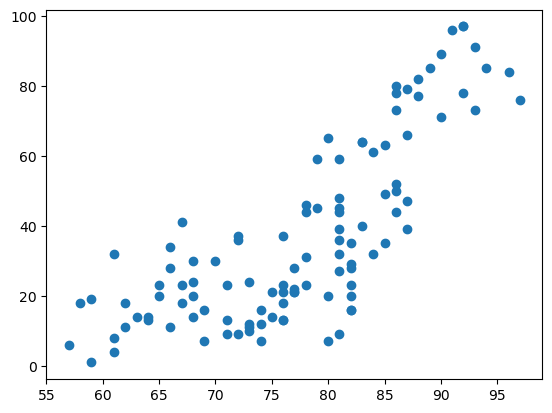

Epoch 1/1000


/home/kiyong/anaconda3/envs/data_env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 767.8208 
Epoch 2/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 757.7692 
Epoch 3/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 748.0541 
Epoch 4/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 738.3037 
Epoch 5/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 728.6813 
Epoch 6/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 719.6857
Epoch 7/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 710.7250 
Epoch 8/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 702.5883 
Epoch 9/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 694.3024 
Epoch 10/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 685.7054 
Epoch 11/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 678.4487 
Epoch 12/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 670.9021  
Epoch 13/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 663.5620 
Epoch 14/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 656.4236 
Epoch 15/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - l

In [3]:
# 아까 우리의 온도에 따른 오존량 예제에서 이상치를 제거하고 Simple linear Regression을 Tensorflow버전과 PyTorch버전으로 구현해보자.
# 그리고 결과를 산점도와 모델 직선으로 그려서 확인해보자.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from scipy import stats # 이게 있어야지 scipy 안에 있는Z-score 사용

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard # tensorboard가 가지는 부가기능

# Raw Data loading 
df = pd.read_csv('./data/ozone.csv')

# 필요한 컬럼만 추출
training_data_set = df[['Temp','Ozone']]

# 결측치 처리
training_data_set = training_data_set.dropna(how='any')
training_data_set


# 이상치 처리
zscore_threshold = 1.8 # 1.8이나 2.0을 많이 사용
mask = np.abs(stats.zscore(training_data_set['Ozone'])) <= zscore_threshold

training_data_set = training_data_set.loc[mask]
training_data_set.shape  # (109, 2)

# 3. 학습데이터 생성
x_data = training_data_set['Temp'].values.reshape(-1,1)
y_data = training_data_set['Ozone'].values.reshape(-1,1)


# 4. 데이터분포 확인
plt.scatter(x_data.ravel(),
            y_data.ravel())
plt.show()

# 모델 구현
keras_model = Sequential()

# Layer 추가
keras_model.add(Dense(input_shape=(1,),
                      units=1,
                      activation='linear',
                      name='dense_layer'))
# Model compile
keras_model.compile(optimizer=Adam(learning_rate=1e-3),
                    loss='mse')

# callback을 하나 설정 => Tensorboard callback을 설정
log_dir = './logs/' + datetime.datetime.now().strftime('%Y%m%d-%H%M%S')
tensorboard_callback = TensorBoard(log_dir=log_dir,
                                   histogram_freq=1)

# 학습을 진행
keras_model.fit(x_data,
                 y_data,
                 epochs=1000,
                 verbose=1,
                 callbacks=[tensorboard_callback])